# Loading all necessary Libraries

* **Pandas and numpy** for loading the data and doing preprocessing
* **Matplotlib and Seaborn** for Visualization of the data
* **sklearn** for splitting, training and testing the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,  r2_score

# Loading the dataset

In [ ]:
df = pd.read_csv('countries_of_world.csv', decimal = ',')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
df.shape

(227, 20)

In [ ]:
df.size

4540

In [ ]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

# **Handling the missing data**

Here we have some missing values in some of the features. For handling this, we have filled the null value with the median
value of the region where the country belongs. we did not use the mean value because the mean is affected by the outliers or
the extreme values which we can detect in some countries. Also we consider that the GDP of a country resonated the GDP of the
region where it belongs.

Here climate is a categorical variable. So, for the feature climate we use the mode value of the region where it belongs because the climate of a country will resemble maximum climate the countries within a geographical region will experience.

In [ ]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()

    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [ ]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

# data exploration

In [ ]:
reg = df.groupby('Region')[['GDP ($ per capita)']].mean()
reg

,GDP ($ per capita)
Region,
ASIA (EX. NEAR EAST),8053.571429
BALTICS,11300.000000
C.W. OF IND. STATES,4000.000000
EASTERN EUROPE,9808.333333
LATIN AMER. & CARIB,8682.222222
NEAR EAST,10456.250000
NORTHERN AFRICA,5550.000000
NORTHERN AMERICA,26100.000000
OCEANIA,8247.619048


From the pie chart below we can say that western europe region has the highest GDP per capita followed by North America
and Sub-Saharan African region has the lowest GDP per capita

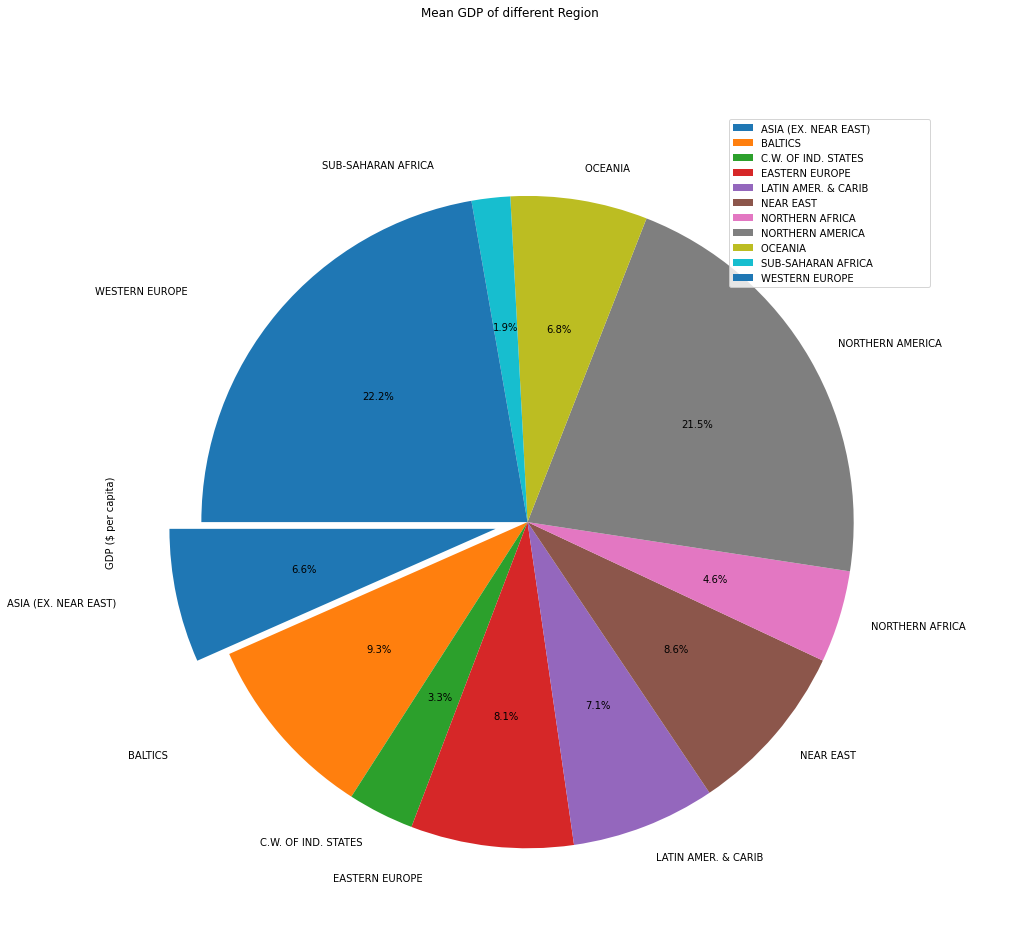

In [ ]:
explode = (0.1,0,0,0,0,0,0,0,0,0,0)
reg.plot(kind = 'pie', explode = explode,startangle = 180,
         title = 'Mean GDP of different Region',
         figsize = (20,15),
         subplots = True, autopct='%1.1f%%')
plt.legend(loc = 'best')
plt.show()

#Plotting Top 20 countries with high GDP along with world mean data

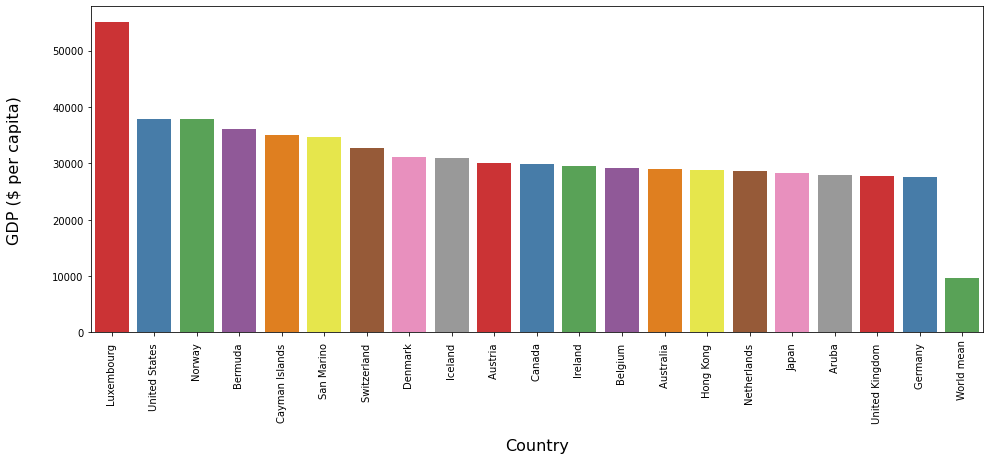

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[df['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

#Plotting Bottom 20 countries with high GDP along with world mean data

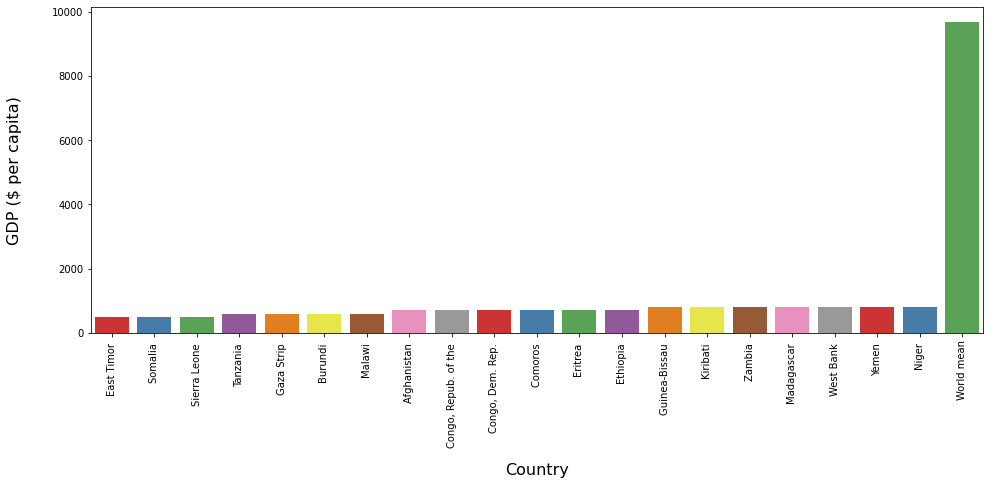

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=True).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[df['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

#spider plot

In [ ]:
df2 = df.set_index('Country')
df2.index

Index(['Afghanistan ', 'Albania ', 'Algeria ', 'American Samoa ', 'Andorra ',
       'Angola ', 'Anguilla ', 'Antigua & Barbuda ', 'Argentina ', 'Armenia ',
       ...
       'Vanuatu ', 'Venezuela ', 'Vietnam ', 'Virgin Islands ',
       'Wallis and Futuna ', 'West Bank ', 'Western Sahara ', 'Yemen ',
       'Zambia ', 'Zimbabwe '],
      dtype='object', name='Country', length=227)

In [ ]:
canada = df2.loc['Canada ',['Literacy (%)','Birthrate',
                            'Deathrate','Pop. Density (per sq. mi.)']].values.tolist()
canada += canada[:1]
# top 2
luxembourg = df2.loc['Luxembourg ',['Literacy (%)','Birthrate',
                            'Deathrate','Pop. Density (per sq. mi.)']].values.tolist()
luxembourg += luxembourg[:1]
united_states = df2.loc['United States ',['Literacy (%)','Birthrate',
                            'Deathrate','Pop. Density (per sq. mi.)']].values.tolist()
united_states += united_states[:1]
# bottom 2
east_timor = df2.loc['East Timor ',['Literacy (%)','Birthrate',
                            'Deathrate','Pop. Density (per sq. mi.)']].values.tolist()
east_timor += east_timor[:1]
somalia = df2.loc['Somalia ',['Literacy (%)','Birthrate',
                            'Deathrate','Pop. Density (per sq. mi.)']].values.tolist()
somalia += somalia[:1]


In [ ]:
#categories
categories = ['Literacy (%)','Birthrate',
                            'Deathrate','Pop. Density (per sq. mi.)']

## Angles
N = 4
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]

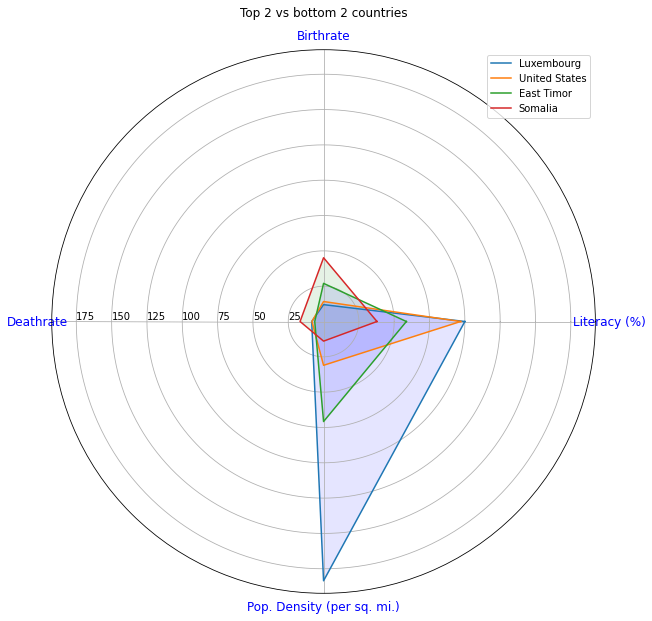

In [ ]:
## initialize spider plot
plt.figure(figsize = (20,10))
ax = plt.subplot(111, polar = True)
plt.xticks(angles[:-1], categories, color = 'b', size = 12)
# draw labels
ax.set_rlabel_position(180)

# canada
#x.plot(angles, canada, label = 'Luxembourg')
#x.fill(angles, canada, 'b', alpha = 0.1)

# luxembourg
ax.plot(angles, luxembourg, label = 'Luxembourg')
ax.fill(angles, luxembourg, 'b', alpha = 0.1)

# United States
ax.plot(angles, united_states, label = 'United States')
ax.fill(angles, united_states, 'b', alpha = 0.1)

#east timor
ax.plot(angles, east_timor, label = 'East Timor')
ax.fill(angles, east_timor, 'b', alpha = 0.1)

#Somalia
ax.plot(angles, somalia, label = 'Somalia')
ax.fill(angles, somalia, 'g', alpha = 0.1)

plt.title('Top 2 vs bottom 2 countries')
plt.legend()
plt.show()

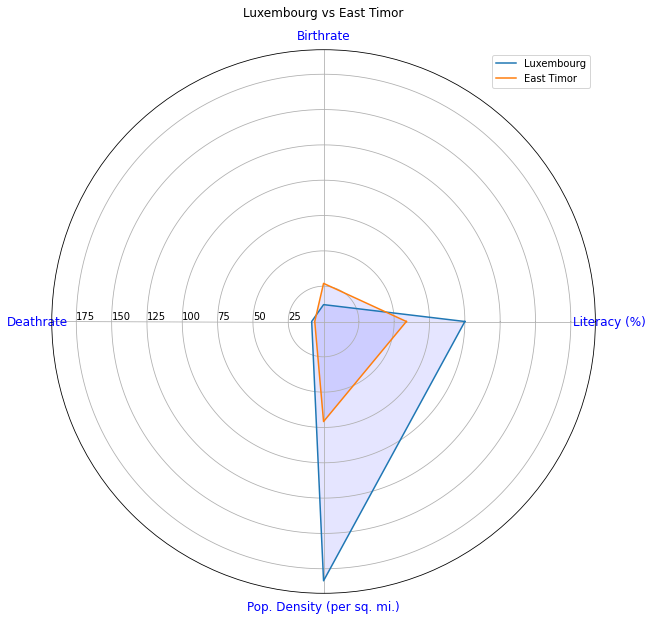

In [ ]:
plt.figure(figsize = (20,10))
ax = plt.subplot(111, polar = True)
plt.xticks(angles[:-1], categories, color = 'b', size = 12)

# draw labels
ax.set_rlabel_position(180)
# luxembourg
ax.plot(angles, luxembourg, label = 'Luxembourg')
ax.fill(angles, luxembourg, 'b', alpha = 0.1)

#east timor
ax.plot(angles, east_timor, label = 'East Timor')
ax.fill(angles, east_timor, 'b', alpha = 0.1)

plt.title('Luxembourg vs East Timor')
plt.legend()
plt.show()

The data we have is of before 2010. so from the above plot we can see that the lowest gdp country,south Asian country, East Timor has lowest death rate than Luxembourg and USA. From this we can infere that either there is good health facility in East Timor or the people of East Timor are naturally more healthier. One of the reason behind low GDP per capita of East Timor is that it got independence from Indonesia at 2002, before that it was colonized by portugese. After their independence the country is progressing slowly being its main export as petroleum products and coffee.
On the other hand,African country, Somalia has highest death rate. The main reason behind this maybe the 30 years long civil war and famine. The  country is still lagging behind due to poor governance.
Also we can see that Luxembourg has highest population density because it is one of the small European country surrounded by Belgium, France and Germany.

In [ ]:
df3 = df2.loc[['East Timor ','Luxembourg ']]
df4 = df3.drop(['Region', 'Climate'], axis = 1)

In [ ]:
fig = px.bar(df4)
fig.show()

we have plotted interactive bardiagram using plotly to compare the statistics between the highest GDP country and lowest GDP country.

In [ ]:
fig.write_html('East_timor vs Luxembourg.html', auto_open = True)

From the

# Box plot

From the box plot based on Region below we can see that there are some outliers in the feature GDP per capita in some regions.

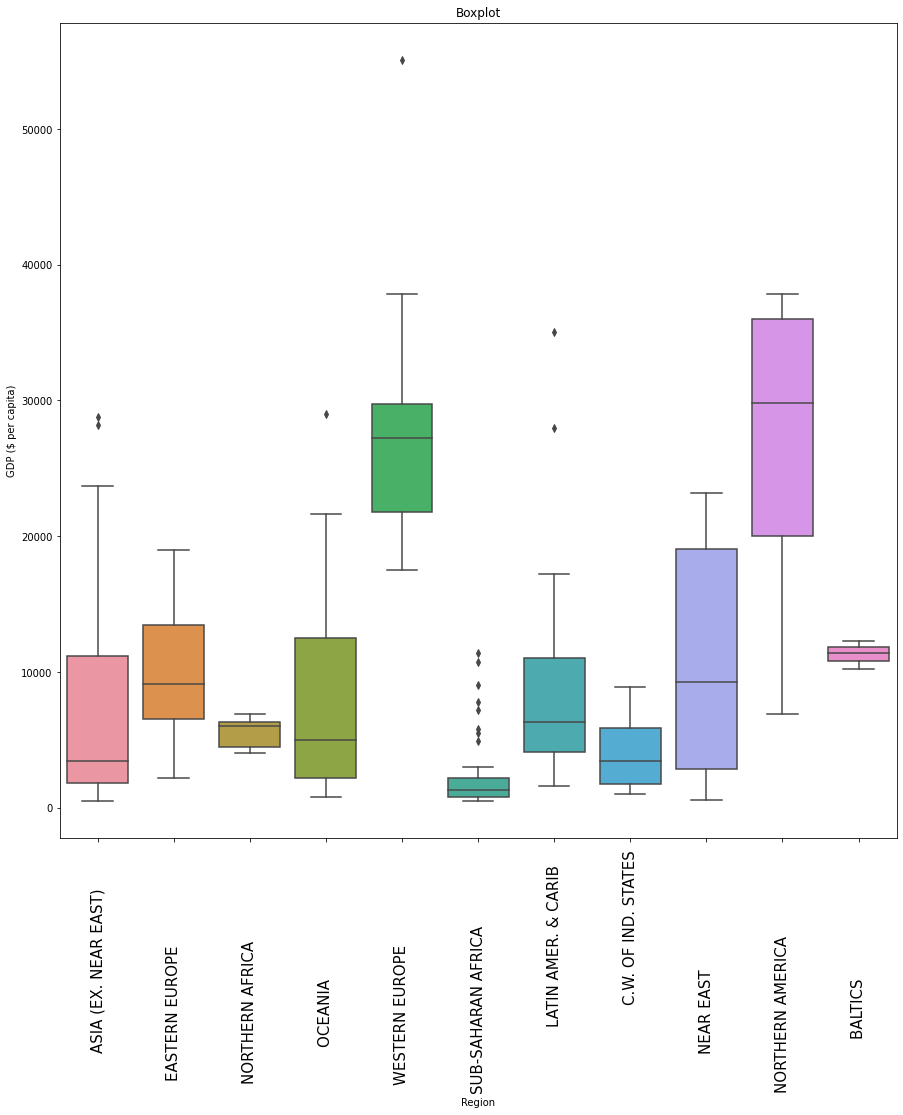

In [ ]:
labels = df['Region'].unique()
plt.figure(figsize=(15,15))
ax = sns.boxplot(x = 'Region', y = 'GDP ($ per capita)', data = df)
ax.set_title('Boxplot')
ax.set_xticklabels( labels, rotation = 90, fontsize = 15)
plt.show()

# correlation plot

From the correlation plot below we can see the relation of different features with eachother.
We can see that the GDP per capita is highly correlated with the number of phones per 1000 people. So we can infer that the
people of country with high GDP can afford phones easily and vice-versa.

And also we can see some strong correlation between birthrate and infant mortality per 1000 births.

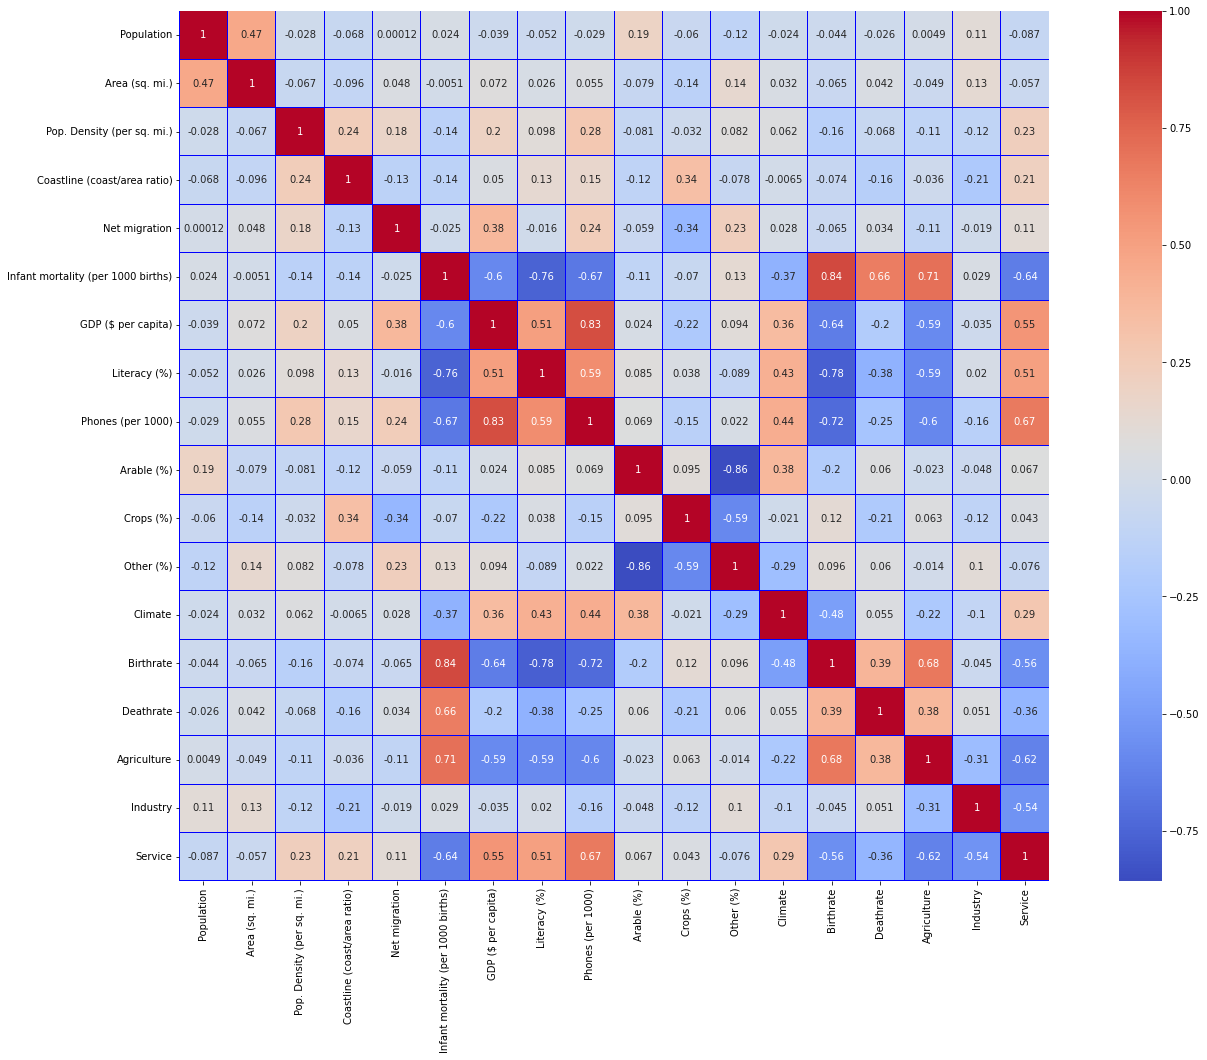

In [ ]:
plt.figure(figsize = (25,16))
sns.heatmap(df.corr(),square = True, linecolor = 'blue', linewidths = 0.05,annot = True, cmap = 'coolwarm')

SO from the linear regression plot below we can define the relationship between the two variable. The more GDP
is the phones per 1000 is also increasing. Hence we can infer that the
people of country with high GDP can afford phones easily and vice-versa.


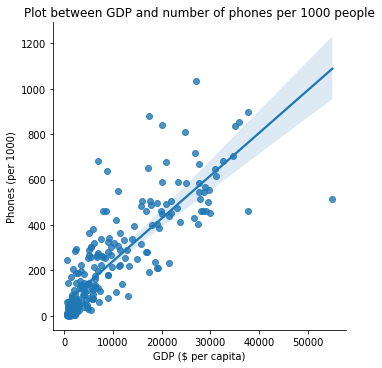

In [ ]:
sns.lmplot(x= 'GDP ($ per capita)', y  = 'Phones (per 1000)', data = df)
plt.title('Plot between GDP and number of phones per 1000 people')
plt.show()

From the linear regression plot below we can see the birth rate is increasing with increase in Infant mortality rate.
So, we can infer that people living in places where there is high mortality rate tends to give more birth as well, maybe because they were unsure of wheather the baby will live or not. We can see that there is high mortality and birth rate in
sub-Saharan Africa.

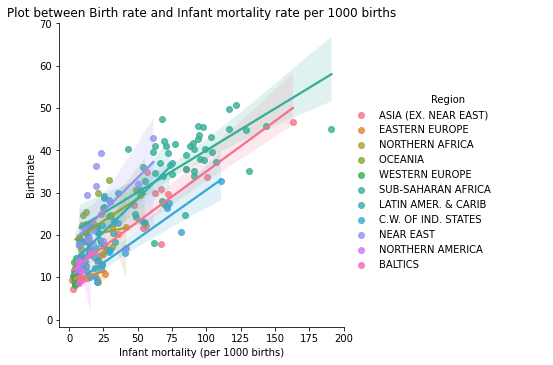

In [ ]:
sns.lmplot(x= 'Infant mortality (per 1000 births)', y  = 'Birthrate', data = df, hue = 'Region')
plt.title('Plot between Birth rate and Infant mortality rate per 1000 births')
plt.show()

# Modelling the data

Here we have two categorical data Region and climate so we will use LabelEncoder to convert them into numerical values.

In [ ]:
LE = LabelEncoder()
df['Regional_label'] = LE.fit_transform(df['Region'])
df['Climate_label'] = LE.fit_transform(df['Climate'])
df.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Regional_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,0.24,97.35,2.0,45.11,24.20,0.0960,0.658,0.246,9,2
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,...,0.00,100.00,2.0,14.17,5.34,0.0400,0.180,0.780,4,2
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,...,4.55,77.27,2.0,16.93,5.37,0.0380,0.220,0.743,4,2
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,...,0.48,87.21,3.0,16.73,7.55,0.0950,0.358,0.547,4,4
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,...,2.30,80.15,4.0,12.07,8.23,0.2390,0.343,0.418,2,5


In [ ]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Regional_label',
       'Climate_label','Service']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [ ]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
r2_train = r2_score(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
r2_test = r2_score(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'r2_score_train:',r2_train)
print('rmse_test:',rmse_test,'r2_score_test:',r2_test)

rmse_train: 4535.949989707452 r2_score_train: 0.7106819299274652
rmse_test: 4699.506631292573 r2_score_test: 0.6816339707224668


In [ ]:
model = RandomForestRegressor()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
r2_train = r2_score(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
r2_test = r2_score(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'r2_score_train:',r2_train)
print('rmse_test:',rmse_test,'r2_test:',r2_test)

rmse_train: 1534.5236118059158 r2_score_train: 0.97355719920249
rmse_test: 4676.4361492456 r2_test: 0.6868933298177162


From abouve result we can see that random forest regressor is performing better than linear regressor in the dataset because it is giving less root mean square error and mean square logarithmic error in both test and train data